In [1]:
import pickle
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# " LOAD DATA BASE"
dataset = 'data.xlsx'
knowledge_base = pd.read_excel(dataset)
knowledge_base.sample(n=20).head(20)

,request,response
6,ola,hola
17,Adios,adíos
97,CHIAO,hasta la proxima
62,Donde estan unbicados,"Medellin, Bogota"
72,púedo pedir domicilio,nos compartes la direccion
49,tienen descuentos,revisa en nuestra campañas
87,robotina,en que puedo ayudarte
46,Gracias por la ayuda,un placer ayudarte
78,NOS VEMOS DESPUES,hasta la proxima
84,biencito,"bien, ¿cuentame en que te puedo ayudar"


In [4]:
knowledge_base["response"].unique()

array(['hola', 'buenas', 'buenas  tardes', 'buenas noches', 'Buenos dias',
       'Hola', 'adiós ', 'ten buen día', 'bye', 'adíos',
       'Bien gracias por preguntar, en que te puedo ayudar',
       'Hola soy robotina tu asistente virtual',
       'Estoy disponible para lo que necesites', 'Hola soy robotina',
       'Solo dime que necesitas', 'Que necesitas que funcione',
       'en que puedo ayudarte', 'un placer ayudarte', 'cuales necesitan',
       'depende de la transportadora ', 'revisa en nuestra campañas',
       'Medellin, Bogota', 'todo lo publicamos en nuestra web',
       'nos compartes la direccion', 'hasta la proxima ',
       'bien, ¿cuentame en que te puedo ayudar ', 'en español por favor',
       'Mi nombre es robotina en que puedo ayudarte'], dtype=object)

In [5]:
len(knowledge_base)

99

In [6]:
# label encode the target variable to transform non-numerical labels
encoder = preprocessing.LabelEncoder()
y = encoder.fit_transform(knowledge_base["response"])  # numerical labels
y

array([22, 22, 13, 14, 15,  1, 22, 22, 22, 22,  3,  3, 10, 10, 25, 16, 11,
       11,  0,  0,  0,  0,  0,  0,  0,  5,  2,  4,  4,  4,  4,  4,  9,  9,
        9,  9,  9,  9,  9,  9,  0,  8,  0,  0, 20, 20, 27, 17, 18, 24, 24,
        6,  6,  6, 26, 26, 26,  3,  3, 27, 22,  3,  6,  6, 20, 20,  9,  9,
       26, 23, 23, 23, 23, 27, 27, 27, 21, 21, 21, 21, 12, 12, 12, 12, 12,
       12, 19, 20, 20, 20, 20,  7,  7,  7, 21, 21, 21, 21, 21])

In [7]:
intent_names = encoder.classes_
intent_names

array(['Bien gracias por preguntar, en que te puedo ayudar',
       'Buenos dias', 'Estoy disponible para lo que necesites', 'Hola',
       'Hola soy robotina', 'Hola soy robotina tu asistente virtual',
       'Medellin, Bogota', 'Mi nombre es robotina en que puedo ayudarte',
       'Que necesitas que funcione', 'Solo dime que necesitas', 'adiós ',
       'adíos', 'bien, ¿cuentame en que te puedo ayudar ', 'buenas',
       'buenas  tardes', 'buenas noches', 'bye', 'cuales necesitan',
       'depende de la transportadora ', 'en español por favor',
       'en que puedo ayudarte', 'hasta la proxima ', 'hola',
       'nos compartes la direccion', 'revisa en nuestra campañas',
       'ten buen día', 'todo lo publicamos en nuestra web',
       'un placer ayudarte'], dtype=object)

In [8]:
x = knowledge_base["request"]
x

0                  hola
1                    hi
2                buenas
3         buenas tardes
4         buenas noches
            ...        
94     HASTA LA PRÓXIMA
95    hásta la proxima 
96                 CHAO
97                CHIAO
98                chiao
Name: request, Length: 99, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
# Hold-out Partition
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=0)

# PROCESAMIENTO

## ....

In [12]:
" TF-IDF score represents the relative importance of a term in the document and the entire corpus. "
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
x_train_tfidf = tfidf_vect.transform(X_train)
x_train_tfidf

<74x71 sparse matrix of type '<class 'numpy.float64'>'
	with 150 stored elements in Compressed Sparse Row format>

In [13]:
tfidf_vect.get_feature_names_out()

array(['adios', 'ayuda', 'ayudar', 'bien', 'biencito', 'biensito', 'bot',
       'buenas', 'buenos', 'bye', 'chao', 'chiao', 'cmo', 'como',
       'compro', 'comó', 'con', 'cuanto', 'cómo', 'demora', 'depues',
       'descuentos', 'despúes', 'dias', 'domiciilio', 'domicilio',
       'donde', 'eres', 'estan', 'estas', 'estás', 'ey', 'funciona',
       'gracias', 'hasta', 'hay', 'hello', 'hi', 'hola', 'hooooooola',
       'hásta', 'la', 'llamas', 'luego', 'mas', 'me', 'muchas', 'nbiem',
       'noches', 'nos', 'oe', 'ola', 'olaaaaa', 'ooooola', 'pedir', 'por',
       'productos', 'proxima', 'puedes', 'puedo', 'púedo', 'que', 'quién',
       'robotina', 'si', 'te', 'tienen', 'ubicados', 'ustedes', 'vas',
       'vemos'], dtype=object)

In [14]:
" MODEL TRAINING AND DEVELOPMENT"
nfolds = 5
tuned_parameters = {'C': [0.001, 0.10, 0.1, 10, 100, 1000]}
lr_model = GridSearchCV(LogisticRegression(), tuned_parameters, cv=nfolds,  scoring='accuracy') 
lr_model.fit(x_train_tfidf, y_train)

/home/jonat/.local/lib/python3.8/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/home/jonat/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/jonat/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 0.1, 10, 100, 1000]},
             scoring='accuracy')

In [15]:
means = lr_model.cv_results_['mean_test_score']
stds = lr_model.cv_results_['std_test_score']
parameters = lr_model.cv_results_['params']
results = pd.concat((pd.DataFrame.from_dict(parameters), pd.DataFrame(means, columns=['Mean']), pd.DataFrame(stds, columns=['STD'])), axis=1)
results

,C,Mean,STD
0,0.001,0.121905,0.027864
1,0.100,0.189524,0.050968
2,0.100,0.189524,0.050968
3,10.000,0.638095,0.120166
4,100.000,0.651429,0.111164
5,1000.000,0.637143,0.085417


In [16]:
best_c = lr_model.cv_results_['params'][lr_model.best_index_]['C']
best_c

100

In [17]:
# TEST & METRICS & ERROR ANALYSIS

best_lr_model = LogisticRegression(C=best_c).fit(x_train_tfidf, y_train)

In [18]:
X_test.head()

26                  ¿Qué haces?
86                 Well and you
2                        buenas
55    que mas productos tienen?
75                      gracias
Name: request, dtype: object

In [19]:
# PROCESAMIENTO DEL CONJUNTO DE TEST

In [20]:
x_test_tfidf = tfidf_vect.transform(X_test)
x_test_tfidf

<25x71 sparse matrix of type '<class 'numpy.float64'>'
	with 40 stored elements in Compressed Sparse Row format>

In [21]:
y_pred = best_lr_model.predict(x_test_tfidf)

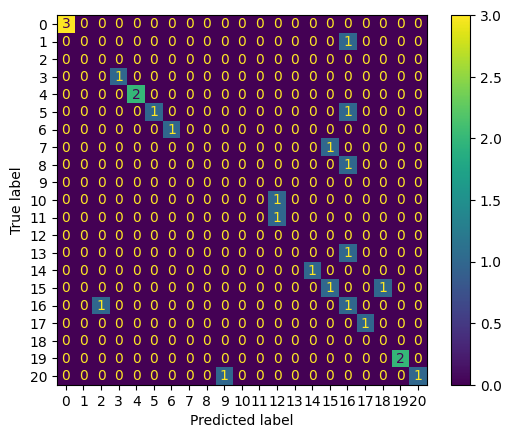

In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         1
          20       1.00      1.00      1.00         1
          21       0.50      0.50      0.50         2
          22       0.20      0.50      0.29         2
          23       1.00    

/home/jonat/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jonat/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jonat/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jonat/.local/lib/python3.8/site-packages/skle

In [24]:
# TRAIN MODEL WITH ALL DATA FOR PRODUCTION
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(x)
x_tfidf = tfidf_vect.transform(x)

pdn_lr_model = LogisticRegression(C=best_c).fit(x_tfidf, y)

In [25]:
pdn_lr_model

LogisticRegression(C=100)

In [26]:
# "SAVE FINAL MODEL"
pickle.dump(pdn_lr_model, open('data.pkl', 'wb'))
pickle.dump(tfidf_vect, open('vocabulary.pkl', 'wb'))
pickle.dump(intent_names, open('tag_name.pkl', 'wb'))